In [2]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# 1. Non-centered Data and Principal Component Analysis (PCA)

## 1.1

In [3]:
A = np.random.randn(3,2)
c = np.sqrt(3)*np.random.randn(3,1)

print(A, "\n")
print(c)

[[-0.39562774  0.54154434]
 [ 0.03863384 -0.10824881]
 [-1.66159864  1.13702877]] 

[[ 2.0377369 ]
 [-2.25448525]
 [ 1.86302514]]


## 1.2

In [4]:
n = 250; # number of data samples

b = np.random.randn(2,n) # 2x250

In [5]:
x = np.dot(A,b)
X = x + np.tile(c,n)
X = X.T
print(X)

[[ 2.91076446e+00 -2.40374292e+00  4.21477995e+00]
 [ 8.18692939e-01 -2.02896801e+00 -1.06947853e+00]
 [ 2.51497500e+00 -2.31295743e+00  3.62355115e+00]
 [ 1.29032624e+00 -2.15681986e+00 -7.69031935e-01]
 [ 2.68971704e+00 -2.33329681e+00  4.29016176e+00]
 [ 2.91877996e+00 -2.34334463e+00  5.50531205e+00]
 [ 1.37935636e+00 -2.14275601e+00  7.24096682e-02]
 [ 1.92585598e+00 -2.26160282e+00  1.02247179e+00]
 [ 1.16401793e+00 -2.11855496e+00 -7.66810499e-01]
 [ 1.77152269e+00 -2.18243412e+00  1.69107391e+00]
 [ 2.87998421e+00 -2.37636095e+00  4.58627691e+00]
 [ 1.21580316e+00 -2.11097314e+00 -2.89674323e-01]
 [ 1.34759239e+00 -2.16651474e+00 -6.12803517e-01]
 [ 1.50231590e+00 -2.15147883e+00  6.56301146e-01]
 [ 2.41298575e+00 -2.35890200e+00  2.04674616e+00]
 [ 1.83565075e+00 -2.23141394e+00  1.08284012e+00]
 [ 3.26690071e+00 -2.46462500e+00  5.17423898e+00]
 [ 2.96421082e+00 -2.44281340e+00  3.74382738e+00]
 [ 2.44245567e+00 -2.27884986e+00  3.87418164e+00]
 [ 2.33202773e+00 -2.29863315e+

## 1.3

In [6]:
X_rank = np.linalg.matrix_rank(X)
print("Rank of X:",X_rank)

Rank of X: 3


## 1.4

There are some ways to keep our data centered. This would have to rely on keeping the rank of **X** at 2. If one of the columns of **X** is not linearly independent then it will still be centered. From addition, we can see that **A**, **b** and **c** all lie in the same column space. <br>
1. **c** = 2**b** would keep the data centered (Rank = 2). <br>
2. **c** = a column of **A**  would also keep the data centered (Rank = 2).<br>

## 1.5

### (a)

In [7]:
## SVD ##
u, s, vt = np.linalg.svd(X)

In [8]:
U = vt[0:2].T
print(U)

[[-0.53989445  0.2334507 ]
 [ 0.53113109 -0.65086738]
 [-0.65300363 -0.72240738]]


### (b)

In [108]:
x_hat = X@U@U.T
print(x_hat)

[[ 2.83672957 -2.45340406  4.23559829]
 [ 0.97668022 -1.92299326 -1.11390397]
 [ 2.55123381 -2.28863574  3.61335531]
 [ 1.2512011  -2.18306423 -0.75803009]
 [ 2.74320891 -2.29741552  4.27512005]
 [ 3.05034335 -2.2550945   5.46831691]
 [ 1.430581   -2.10839553  0.05800549]
 [ 1.84652256 -2.31481811  1.04478006]
 [ 1.19112201 -2.10037408 -0.77443207]
 [ 1.88135449 -2.10876111  1.66018962]
 [ 2.8823883  -2.37474833  4.58560088]
 [ 1.29346125 -2.05888162 -0.31151149]
 [ 1.30399892 -2.19575638 -0.60054519]
 [ 1.58433135 -2.09646449  0.6332387 ]
 [ 2.24611818 -2.47083346  2.09366871]
 [ 1.81317114 -2.24649282  1.0891613 ]
 [ 3.16310722 -2.53424763  5.20342533]
 [ 2.78575019 -2.56252126  3.79400985]
 [ 2.55727278 -2.20183282  3.84189549]
 [ 2.32696836 -2.30202688  2.78387088]
 [ 1.46344944 -2.06040022  0.28938387]
 [ 2.22487858 -2.24193595  2.5641597 ]
 [ 1.38512152 -2.07358488 -0.02061996]
 [ 1.90693602 -2.1978773   1.53858117]
 [ 0.96073013 -2.09068182 -1.57063921]
 [ 2.92260098 -2.39945242

### (c)

In [119]:
led_zeppelin = X - x_hat # inner function of PCA error named after 1970s band Led Zeppelin
pca_error = np.linalg.norm(led_zeppelin)**2
print("Error:",pca_error)

Error: 5.152384195025942


Albeit only using two major directions, the error is nowhere close to being 0. 

## 1.6

In [110]:
## Empirical Mean) ##
mu = (1/n)*(X.sum(axis=0))
print(mu)

[ 2.04070523 -2.2523033   1.92627135]


In [111]:
x_cent = X - np.tile(mu,(n,1))
print(x_cent)

[[ 8.70059231e-01 -1.51439623e-01  2.28850861e+00]
 [-1.22201229e+00  2.23335292e-01 -2.99574987e+00]
 [ 4.74269775e-01 -6.06541310e-02  1.69727981e+00]
 [-7.50378990e-01  9.54834413e-02 -2.69530328e+00]
 [ 6.49011817e-01 -8.09935050e-02  2.36389042e+00]
 [ 8.78074736e-01 -9.10413256e-02  3.57904071e+00]
 [-6.61348866e-01  1.09547295e-01 -1.85386168e+00]
 [-1.14849246e-01 -9.29951644e-03 -9.03799555e-01]
 [-8.76687293e-01  1.33748345e-01 -2.69308184e+00]
 [-2.69182537e-01  6.98691862e-02 -2.35197432e-01]
 [ 8.39278981e-01 -1.24057647e-01  2.66000556e+00]
 [-8.24902070e-01  1.41330165e-01 -2.21594567e+00]
 [-6.93112834e-01  8.57885645e-02 -2.53907486e+00]
 [-5.38389326e-01  1.00824467e-01 -1.26997020e+00]
 [ 3.72280524e-01 -1.06598694e-01  1.20474819e-01]
 [-2.05054473e-01  2.08893632e-02 -8.43431224e-01]
 [ 1.22619548e+00 -2.12321703e-01  3.24796764e+00]
 [ 9.23505597e-01 -1.90510097e-01  1.81755603e+00]
 [ 4.01750445e-01 -2.65465620e-02  1.94791030e+00]
 [ 2.91322508e-01 -4.63298513e-

In [76]:
## Top Principal Components ##
u2, s2, vt2 = np.linalg.svd(x_cent)

U2 = vt2[0:2].T
print(U2)

[[-0.30557993 -0.90728947]
 [ 0.04601855  0.28895613]
 [-0.95105373  0.30549987]]


In [120]:
## Centered X hat ##

some_x_hat = (x_cent@U2@U2.T) + np.tile(mu,(n,1))
print(x_hat_cent)

[[ 2.91076446e+00 -2.40374292e+00  4.21477995e+00]
 [ 8.18692939e-01 -2.02896801e+00 -1.06947853e+00]
 [ 2.51497500e+00 -2.31295743e+00  3.62355115e+00]
 [ 1.29032624e+00 -2.15681986e+00 -7.69031935e-01]
 [ 2.68971704e+00 -2.33329681e+00  4.29016176e+00]
 [ 2.91877996e+00 -2.34334463e+00  5.50531205e+00]
 [ 1.37935636e+00 -2.14275601e+00  7.24096682e-02]
 [ 1.92585598e+00 -2.26160282e+00  1.02247179e+00]
 [ 1.16401793e+00 -2.11855496e+00 -7.66810499e-01]
 [ 1.77152269e+00 -2.18243412e+00  1.69107391e+00]
 [ 2.87998421e+00 -2.37636095e+00  4.58627691e+00]
 [ 1.21580316e+00 -2.11097314e+00 -2.89674323e-01]
 [ 1.34759239e+00 -2.16651474e+00 -6.12803517e-01]
 [ 1.50231590e+00 -2.15147883e+00  6.56301146e-01]
 [ 2.41298575e+00 -2.35890200e+00  2.04674616e+00]
 [ 1.83565075e+00 -2.23141394e+00  1.08284012e+00]
 [ 3.26690071e+00 -2.46462500e+00  5.17423898e+00]
 [ 2.96421082e+00 -2.44281340e+00  3.74382738e+00]
 [ 2.44245567e+00 -2.27884986e+00  3.87418164e+00]
 [ 2.33202773e+00 -2.29863315e+

In [121]:
kenny_g = X - some_x_hat # inner function of PCA error named after jazz saxophonist Kenny G
pca_error2 = np.linalg.norm(kenny_g)**2
print("Error:",pca_error2)

Error: 1.1164846999206133e-28


# 2. Preprocessing (Centering) and PCA Using `scikit learn`

In [3]:
from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp

## 2.1

In [88]:
# create an instance of the StandardScaler() object
mean_datascaler = sklpp.StandardScaler(with_mean=True, with_std=False)
# use the fit_transform API to simultaneously compute mean and center data
skl_centered_X = mean_datascaler.fit_transform(X)

## 2.2

In [59]:
print("Manual mean:",mu)
print("Mean using sklearn preprrocessing:",mean_datascaler.mean_)

Manual mean: [ 2.04070523 -2.2523033   1.92627135]
Mean using sklearn preprrocessing: [ 2.04070523 -2.2523033   1.92627135]


These two vectors are indeed the same 

## 2.3

In [63]:
pink_floyd = x_cent - skl_centered_X
skl_error = np.linalg.norm(pink_floyd)**2
print("Error:",skl_error)

Error: 0.0


Previous centered **X** and using skl to center **X** are the same 

## 2.4

In [69]:
# create an instance of the PCA() object
data_pca = skldecomp.PCA(n_components=2, svd_solver='full')
# use fit_transform API to simultaneously compute PCA features & directions
skl_features = data_pca.fit_transform(skl_centered_X)

## 2.5

In [75]:
print(U2,"\n")

print(data_pca.components_.T)

[[-0.30557993 -0.90728947]
 [ 0.04601855  0.28895613]
 [-0.95105373  0.30549987]] 

[[-0.30557993 -0.90728947]
 [ 0.04601855  0.28895613]
 [-0.95105373  0.30549987]]


These are also the same as when done manually

## 2.6

In [93]:
crazy_diamond = data_pca.inverse_transform(skl_features) # Named after the Pink Floyd song- Shine on you Crazy Diamond
print(crazy_diamond)

[[ 8.70059231e-01 -1.51439623e-01  2.28850861e+00]
 [-1.22201229e+00  2.23335292e-01 -2.99574987e+00]
 [ 4.74269775e-01 -6.06541310e-02  1.69727981e+00]
 [-7.50378990e-01  9.54834413e-02 -2.69530328e+00]
 [ 6.49011817e-01 -8.09935050e-02  2.36389042e+00]
 [ 8.78074736e-01 -9.10413256e-02  3.57904071e+00]
 [-6.61348866e-01  1.09547295e-01 -1.85386168e+00]
 [-1.14849246e-01 -9.29951644e-03 -9.03799555e-01]
 [-8.76687293e-01  1.33748345e-01 -2.69308184e+00]
 [-2.69182537e-01  6.98691862e-02 -2.35197432e-01]
 [ 8.39278981e-01 -1.24057647e-01  2.66000556e+00]
 [-8.24902070e-01  1.41330165e-01 -2.21594567e+00]
 [-6.93112834e-01  8.57885645e-02 -2.53907486e+00]
 [-5.38389326e-01  1.00824467e-01 -1.26997020e+00]
 [ 3.72280524e-01 -1.06598694e-01  1.20474819e-01]
 [-2.05054473e-01  2.08893632e-02 -8.43431224e-01]
 [ 1.22619548e+00 -2.12321703e-01  3.24796764e+00]
 [ 9.23505597e-01 -1.90510097e-01  1.81755603e+00]
 [ 4.01750445e-01 -2.65465620e-02  1.94791030e+00]
 [ 2.91322508e-01 -4.63298513e-

This seems similar to the previous centered data

In [94]:
pink_floyd2 = x_cent - crazy_diamond
test_error = np.linalg.norm(pink_floyd2)**2
print(test_error)

3.1041883513124323e-27


For all intents and purposes, this is 0. Therefore, form our previous assumption, this is the same as the previous centered data.  

In [98]:
## Uncentered Data ##
shine_on_you = crazy_diamond + mean_datascaler.mean_
print(shine_on_you)

[[ 2.91076446e+00 -2.40374292e+00  4.21477995e+00]
 [ 8.18692939e-01 -2.02896801e+00 -1.06947853e+00]
 [ 2.51497500e+00 -2.31295743e+00  3.62355115e+00]
 [ 1.29032624e+00 -2.15681986e+00 -7.69031935e-01]
 [ 2.68971704e+00 -2.33329681e+00  4.29016176e+00]
 [ 2.91877996e+00 -2.34334463e+00  5.50531205e+00]
 [ 1.37935636e+00 -2.14275601e+00  7.24096682e-02]
 [ 1.92585598e+00 -2.26160282e+00  1.02247179e+00]
 [ 1.16401793e+00 -2.11855496e+00 -7.66810499e-01]
 [ 1.77152269e+00 -2.18243412e+00  1.69107391e+00]
 [ 2.87998421e+00 -2.37636095e+00  4.58627691e+00]
 [ 1.21580316e+00 -2.11097314e+00 -2.89674323e-01]
 [ 1.34759239e+00 -2.16651474e+00 -6.12803517e-01]
 [ 1.50231590e+00 -2.15147883e+00  6.56301146e-01]
 [ 2.41298575e+00 -2.35890200e+00  2.04674616e+00]
 [ 1.83565075e+00 -2.23141394e+00  1.08284012e+00]
 [ 3.26690071e+00 -2.46462500e+00  5.17423898e+00]
 [ 2.96421082e+00 -2.44281340e+00  3.74382738e+00]
 [ 2.44245567e+00 -2.27884986e+00  3.87418164e+00]
 [ 2.33202773e+00 -2.29863315e+

## 2.7

In [122]:
skl_x_hat = shine_on_you

atom_heart_mother = some_x_hat - skl_x_hat # named after another Pink Floyd Song
center_error = np.linalg.norm(atom_heart_mother)**2
print("Error:",center_error)

Error: 2.6634779129139497e-27


# 3. PCA as a Denoising Tool

## 3.1

In [5]:
a = np.random.randn(3,1)
print(a)

[[-0.76695395]
 [-0.01177144]
 [ 0.09191274]]


## 3.2

In [78]:
three_b = np.sqrt(4)*np.random.randn(1,100)

X3 = np.dot(a, three_b) 

X3 = X3.T # X matrix is now 100x3
print(X3)

[[-8.60592212e-01 -1.32086271e-02  1.03134464e-01]
 [ 1.68592848e+00  2.58761353e-02 -2.02043811e-01]
 [ 1.86728887e+00  2.86597090e-02 -2.23778271e-01]
 [-3.33536592e+00 -5.11921954e-02  3.99714490e-01]
 [ 5.69161724e-01  8.73566465e-03 -6.82090642e-02]
 [-3.38016271e+00 -5.18797498e-02  4.05082994e-01]
 [ 6.52407889e-01  1.00133517e-02 -7.81853904e-02]
 [ 2.19380983e+00  3.36712505e-02 -2.62908958e-01]
 [ 3.85590428e-01  5.91815740e-03 -4.62096468e-02]
 [ 1.87733712e+00  2.88139326e-02 -2.24982466e-01]
 [ 2.67292215e+00  4.10248099e-02 -3.20326387e-01]
 [ 1.95645729e-01  3.00282927e-03 -2.34464328e-02]
 [ 2.07237036e-01  3.18073612e-03 -2.48355497e-02]
 [ 5.37279293e-01  8.24632354e-03 -6.43882331e-02]
 [-8.12619888e-01 -1.24723335e-02  9.73854000e-02]
 [ 1.15018779e+00  1.76534268e-02 -1.37839966e-01]
 [ 5.01276479e-01  7.69374158e-03 -6.00736102e-02]
 [ 3.26922754e-02  5.01770836e-04 -3.91788382e-03]
 [-7.46494597e-01 -1.14574227e-02  8.94608611e-02]
 [-1.62400917e+00 -2.49257792e-

## 3.3

In [129]:
noise = np.sqrt(0.05)*np.random.randn(100,3)

Y = X3 + noise # noisy data sample
print(Y)

[[-1.10436528e+00  2.20859693e-01  7.88608010e-02]
 [ 2.09674738e+00  3.70149889e-01 -4.73100487e-02]
 [ 1.91858771e+00 -7.86919607e-02 -3.79099545e-01]
 [-3.24126925e+00 -1.84196302e-01  4.71075094e-01]
 [ 3.98200453e-01  3.85920202e-01 -5.32787651e-02]
 [-3.28151073e+00  8.95361755e-02 -4.59712059e-02]
 [ 8.54035998e-01  1.63212509e-02 -2.84454530e-01]
 [ 2.27390041e+00 -2.12286701e-01 -6.57781310e-01]
 [ 3.50311323e-01  1.43019525e-01 -2.05000120e-02]
 [ 1.94221178e+00  1.70368969e-01  1.09731994e-01]
 [ 2.18593459e+00 -4.50619435e-01 -3.61282866e-01]
 [-2.28525952e-01  1.05687864e-02  1.79855233e-01]
 [ 5.30516472e-01  2.90143021e-01 -6.92545113e-02]
 [ 5.60914927e-01 -4.55421578e-01  2.97745328e-01]
 [-8.30375648e-01 -1.55319663e-01 -2.79801427e-01]
 [ 1.16299460e+00 -4.33903071e-01  2.87491527e-02]
 [ 9.07551882e-02  7.76938129e-02  2.19649261e-01]
 [-1.19077432e-01  1.61502924e-01 -3.60533150e-02]
 [-5.43032178e-01  1.37121593e-02  7.00602558e-02]
 [-1.74923428e+00 -5.84568398e-

## 3.4

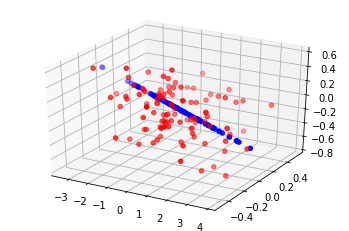

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(X3[:,0],X3[:,1],X3[:,2], c='b', label='Noiseless')
ax.scatter(Y[:,0],Y[:,1],Y[:,2], c='r', label='Noisy')
plt.show()

## 3.5

In [131]:
## Using sklearn for PCA ##
mean_datascaler2 = sklpp.StandardScaler(with_mean=True, with_std=False)

Y_center = mean_datascaler2.fit_transform(Y)

data_pca = skldecomp.PCA(n_components=1, svd_solver='full') # using top Principal Component

Y_features = data_pca.fit_transform(Y_center)

In [132]:
## Projection ##
noiseless_Y = data_pca.inverse_transform(Y_features)
print(noiseless_Y)

[[-1.34630918e+00 -2.33528391e-02  1.45095153e-01]
 [ 1.83310553e+00  3.17967218e-02 -1.97558429e-01]
 [ 1.68468666e+00  2.92222745e-02 -1.81562951e-01]
 [-3.50676555e+00 -6.08277302e-02  3.77933011e-01]
 [ 1.55465836e-01  2.69668268e-03 -1.67549472e-02]
 [-3.48677374e+00 -6.04809558e-02  3.75778443e-01]
 [ 6.24219211e-01  1.08275952e-02 -6.72736865e-02]
 [ 2.06320593e+00  3.57880023e-02 -2.22356932e-01]
 [ 1.00485874e-01  1.74301006e-03 -1.08296173e-02]
 [ 1.66023959e+00  2.87982200e-02 -1.78928229e-01]
 [ 1.94061245e+00  3.36615176e-02 -2.09144722e-01]
 [-4.95144252e-01 -8.58868395e-03  5.33629510e-02]
 [ 2.86283471e-01  4.96582206e-03 -3.08534953e-02]
 [ 2.64457071e-01  4.58722522e-03 -2.85012088e-02]
 [-1.04379544e+00 -1.81054897e-02  1.12492480e-01]
 [ 8.88464849e-01  1.54111529e-02 -9.57521087e-02]
 [-1.82710375e-01 -3.16926161e-03  1.96911602e-02]
 [-3.61402287e-01 -6.26881965e-03  3.89492404e-02]
 [-7.94199589e-01 -1.37760445e-02  8.55929026e-02]
 [-2.00475405e+00 -3.47741065e-

## 3.6

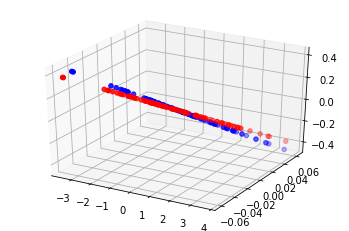

In [133]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(X3[:,0],X3[:,1],X3[:,2], c='b', label='Noiseless')
ax.scatter(noiseless_Y[:,0],noiseless_Y[:,1],noiseless_Y[:,2], c='r', label='Denoised')
plt.show()

## 3.7

In [134]:
X3_hat = noiseless_Y # trying to keep variables in line with exercise variables

In [135]:
## Average Error per Noise Sample ##
purple_haze = (np.linalg.norm(X3 - Y)**2)/100 # variable named after the Jimi Hendrix song- Purple Haze
print(purple_haze)

0.14869504455338256


In [136]:
## Average Error per Denoised Samples ##
stone_free = (np.linalg.norm(X3 - X3_hat)**2)/100 # variable named after the Jimi Hendrix song- Stone Free
print(stone_free)

0.12666002557678155


## 3.8

From this, I can see that the lesson is how PCA can be used to remove noise and get a much smaller error size from it. By centering and projecting out data, and using the top principal component, we can get close to the values of our noiseless **X**. Since **y<sub>i</sub>** lie on the column space of **X**, by using PCA we can remove any noise bias and return it to an almost similar state. 